### Import Necessary Libraries

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load Data

In [26]:
df = pd.read_csv('./transformed_data.csv')
df.dropna()
df

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


In [27]:
df.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


In [28]:
df = df[(df[['HDI', 'TC', 'TD', 'STI', 'GDPCAP']] != 0).all(axis=1)]
df.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,29007.000000,29809.000000,29809.000000,29809.000000,29809.000000,29809.000000
mean,0.726251,8.864973,5.117971,4.093640,16.332341,9.390271
std,0.155843,2.374951,2.540207,0.414866,1.763213,1.203052
min,0.354000,0.693147,0.693147,1.022451,10.432291,6.494117
25%,0.608000,7.170888,3.218876,3.893248,15.412430,8.554484
50%,0.754000,8.834046,4.828314,4.220390,16.265620,9.588836
75%,0.853000,10.648397,6.776507,4.389002,17.477233,10.392249
max,0.953000,15.864821,12.277328,4.605170,21.087439,11.669379


In [29]:
df.isnull().sum()

CODE         0
COUNTRY      0
DATE         0
HDI        802
TC           0
TD           0
STI          0
POP          0
GDPCAP       0
dtype: int64

In [30]:
df.interpolate(method='linear', inplace=True)

/tmp/ipykernel_14299/2868764835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)


In [31]:
df.isnull().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64

In [32]:
country = df.drop_duplicates(subset=['CODE'], keep='last')

In [33]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 279 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     155 non-null    object 
 1   COUNTRY  155 non-null    object 
 2   DATE     155 non-null    object 
 3   HDI      155 non-null    float64
 4   TC       155 non-null    float64
 5   TD       155 non-null    float64
 6   STI      155 non-null    float64
 7   POP      155 non-null    float64
 8   GDPCAP   155 non-null    float64
dtypes: float64(6), object(3)
memory usage: 12.1+ KB


In [34]:
country = country.reset_index()
country.drop('index', inplace=True, axis=1)
country

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2020-10-05,0.498,10.580023,7.287561,3.218876,17.477233,7.497754
1,ALB,Albania,2020-10-05,0.785,9.565634,5.981414,3.773221,14.872537,9.376146
2,DZA,Algeria,2020-10-12,0.754,10.879405,7.496097,4.329812,17.596309,9.540639
3,AGO,Angola,2020-10-08,0.581,8.652598,5.327876,4.266896,17.307957,8.668969
4,ARG,Argentina,2020-10-09,0.825,13.660441,10.030561,4.476882,17.626514,9.848710
...,...,...,...,...,...,...,...,...,...
150,VEN,Venezuela,2020-10-15,0.761,11.350465,6.570883,4.476882,17.163165,9.725856
151,VNM,Vietnam,2020-10-19,0.694,7.033506,3.555348,3.948355,18.393706,8.727759
152,YEM,Yemen,2020-10-12,0.452,7.628031,6.390241,3.814851,17.210890,7.299221
153,ZMB,Zambia,2020-10-05,0.588,9.619266,5.808142,3.794140,16.726989,8.213179


In [35]:
country.drop(['DATE', 'COUNTRY'], inplace=True, axis=1)
country

,CODE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,0.498,10.580023,7.287561,3.218876,17.477233,7.497754
1,ALB,0.785,9.565634,5.981414,3.773221,14.872537,9.376146
2,DZA,0.754,10.879405,7.496097,4.329812,17.596309,9.540639
3,AGO,0.581,8.652598,5.327876,4.266896,17.307957,8.668969
4,ARG,0.825,13.660441,10.030561,4.476882,17.626514,9.848710
...,...,...,...,...,...,...,...
150,VEN,0.761,11.350465,6.570883,4.476882,17.163165,9.725856
151,VNM,0.694,7.033506,3.555348,3.948355,18.393706,8.727759
152,YEM,0.452,7.628031,6.390241,3.814851,17.210890,7.299221
153,ZMB,0.588,9.619266,5.808142,3.794140,16.726989,8.213179


### EDA

array([[<Axes: title={'center': 'HDI'}>, <Axes: title={'center': 'TC'}>],
       [<Axes: title={'center': 'TD'}>, <Axes: title={'center': 'STI'}>],
       [<Axes: title={'center': 'GDPCAP'}>, <Axes: >]], dtype=object)

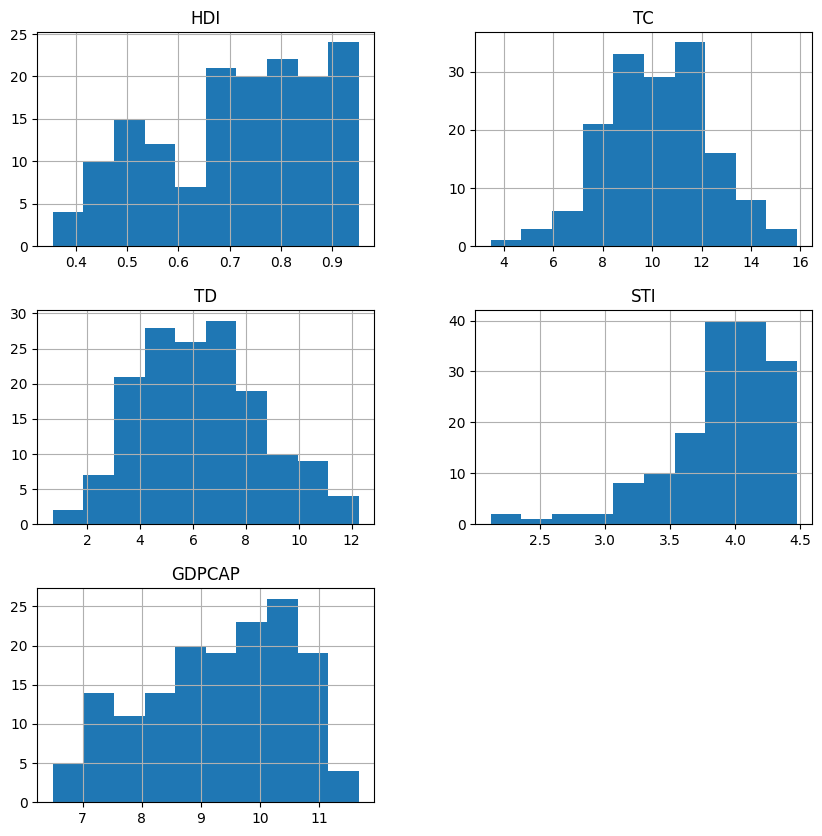

In [36]:
country.hist(column=['HDI', 'TC', 'TD', 'STI', 'GDPCAP'], figsize=(10, 10))

<Axes: >

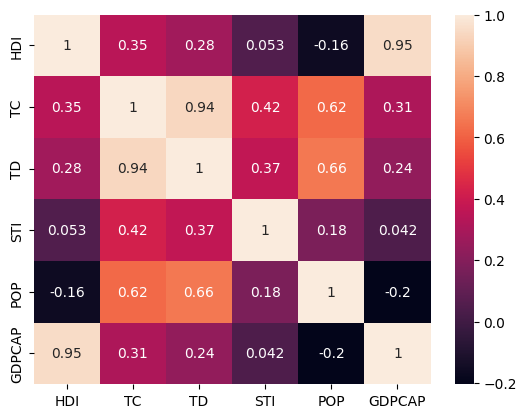

In [37]:
corr = country[['HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP']].corr()
sns.heatmap(corr, annot=True)

In [38]:
country_code = country['CODE'].unique().tolist()
alpha2_code = []
for i in country_code:
    alpha2_code.append(pc.country_alpha3_to_country_alpha2(i))
continent_code = []
for i in alpha2_code:
    try:
        continent_code.append(pc.country_alpha2_to_continent_code(i))
    except:
        continent_code.append('Unknown')
        
country['CONTINENT'] = continent_code
country


,CODE,HDI,TC,TD,STI,POP,GDPCAP,CONTINENT
0,AFG,0.498,10.580023,7.287561,3.218876,17.477233,7.497754,AS
1,ALB,0.785,9.565634,5.981414,3.773221,14.872537,9.376146,EU
2,DZA,0.754,10.879405,7.496097,4.329812,17.596309,9.540639,AF
3,AGO,0.581,8.652598,5.327876,4.266896,17.307957,8.668969,AF
4,ARG,0.825,13.660441,10.030561,4.476882,17.626514,9.848710,SA
...,...,...,...,...,...,...,...,...
150,VEN,0.761,11.350465,6.570883,4.476882,17.163165,9.725856,SA
151,VNM,0.694,7.033506,3.555348,3.948355,18.393706,8.727759,AS
152,YEM,0.452,7.628031,6.390241,3.814851,17.210890,7.299221,AS
153,ZMB,0.588,9.619266,5.808142,3.794140,16.726989,8.213179,AF


In [39]:
country.drop(['TD', 'STI'], inplace=True, axis=1)

In [40]:
continent = country.groupby(by="CONTINENT").size()
continent

CONTINENT
AF    46
AS    38
EU    37
NA    18
OC     4
SA    12
dtype: int64

/home/ubuntu/Documents/Project-Container/Compfest-DSA-2023/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

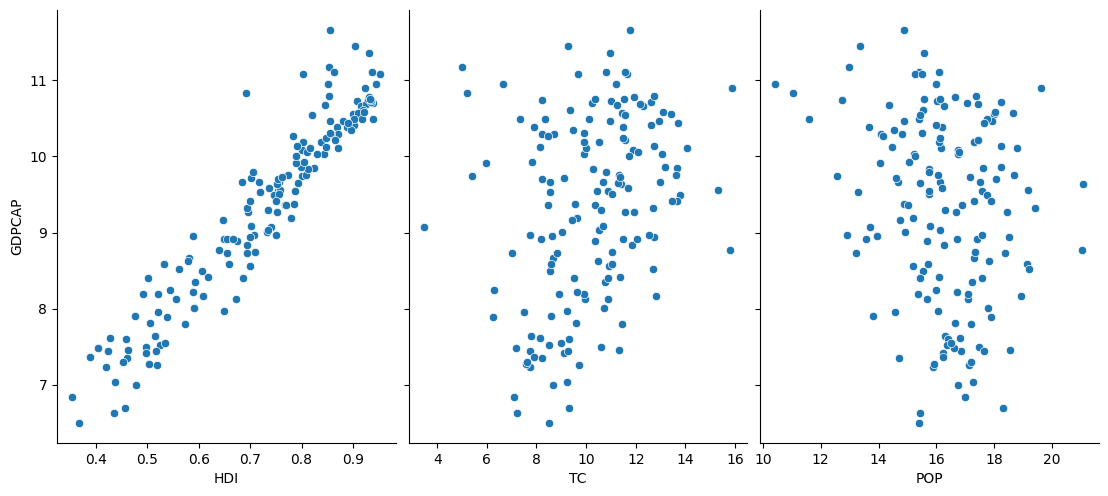

In [41]:
plt.figure(figsize=(10,8))
sns.pairplot(data=country, x_vars=['HDI', 'TC', 'POP'], y_vars=['GDPCAP'], height=5, aspect=0.75)
plt.show()

/home/ubuntu/Documents/Project-Container/Compfest-DSA-2023/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

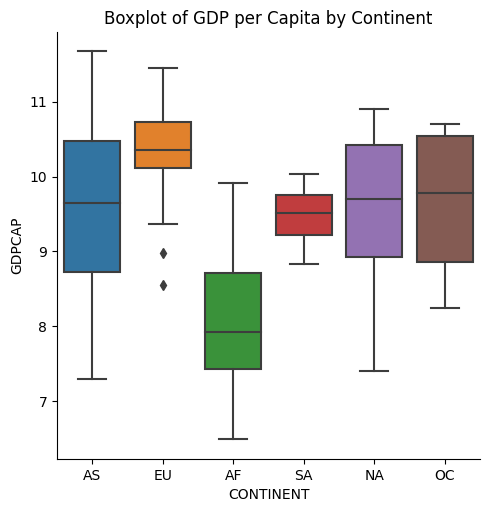

<Figure size 1000x800 with 0 Axes>

In [42]:
sns.catplot(data=country, x='CONTINENT', y='GDPCAP', kind='box')
plt.title('Boxplot of GDP per Capita by Continent')
plt.figure(figsize=(10,8))

Text(0.5, 1.0, 'Scatterplot of GDP per Capita by HDI')

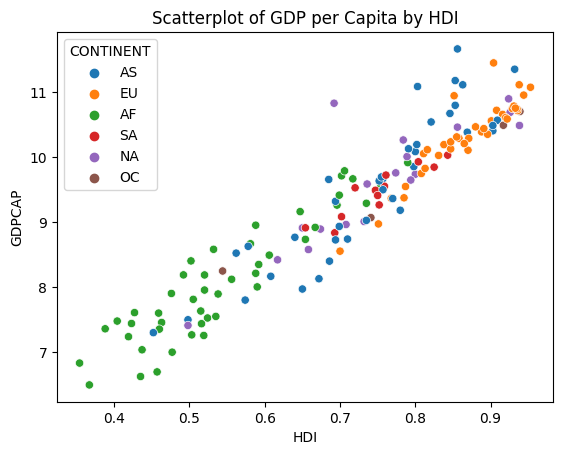

In [43]:
sns.scatterplot(data=country, x='HDI', y='GDPCAP', hue='CONTINENT')
plt.title('Scatterplot of GDP per Capita by HDI')

In [44]:
continent_mapping = {'AS':1,
                    'EU':2,
                    'NA':3,
                    'OC':4,
                    'SA':5,
                    'AF':6}
country['CONTINENT'] = country['CONTINENT'].map(continent_mapping)
country

,CODE,HDI,TC,POP,GDPCAP,CONTINENT
0,AFG,0.498,10.580023,17.477233,7.497754,1
1,ALB,0.785,9.565634,14.872537,9.376146,2
2,DZA,0.754,10.879405,17.596309,9.540639,6
3,AGO,0.581,8.652598,17.307957,8.668969,6
4,ARG,0.825,13.660441,17.626514,9.848710,5
...,...,...,...,...,...,...
150,VEN,0.761,11.350465,17.163165,9.725856,5
151,VNM,0.694,7.033506,18.393706,8.727759,1
152,YEM,0.452,7.628031,17.210890,7.299221,1
153,ZMB,0.588,9.619266,16.726989,8.213179,6


In [45]:
# Select the features (independent variables) and target variable (dependent variable)
X = country[['HDI', 'TC', 'POP', 'CONTINENT']]
y = country['GDPCAP']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Mean Squared Error (MSE): 0.13766475076878398
R-squared (R2) Score: 0.888903880401063


In [47]:
# Create a table comparing actual GDPCAP vs predicted GDPCAP
comparison_df = pd.DataFrame({'Actual GDPCAP': y_test, 'Predicted GDPCAP': y_pred})
print(comparison_df)

     Actual GDPCAP  Predicted GDPCAP
81        9.791522          9.285207
142      10.131791          9.721831
31        9.492126          9.519155
29       10.033069         10.247178
118      10.948373         10.497291
60        8.421078          8.603291
93        7.035359          7.224815
147      10.900906         10.695695
153       8.213179          8.347750
68       10.408265         10.663390
42        9.266904          9.571690
138       9.697550          9.352687
78        9.500587          9.592596
75       11.090272          9.967991
15        7.632515          7.802812
19        9.668232          9.370862
30        9.636177          9.226418
90        9.760568          9.623029
117       7.525215          7.882285
137       7.894804          7.822832
18        9.368531          9.711586
12        9.750801          9.956182
9        10.675693         10.322665
24        8.121161          8.105570
69       10.469372         10.396658
131       8.404362          7.675740
9

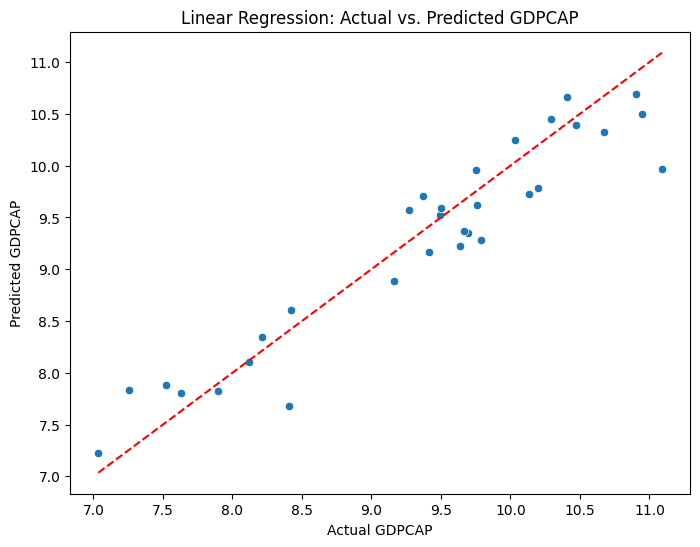

In [48]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual GDPCAP')
plt.ylabel('Predicted GDPCAP')
plt.title('Linear Regression: Actual vs. Predicted GDPCAP')
plt.show()